In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
City_name, Lat, Lng, Max_Tmp, Humidity, Cloudiness, Wind_Spd, Country, Date = [], [],[],[],[],[],[],[],[]
i,b=0,1

# Loop through each character
for city in cities:
    i=i+1
    # Create search query, make request and store in json
    response = requests.get(query_url + city).json()
    
    #Try to grab the height and mass of characters if they are available in the Star Wars API
    try:
        City_name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Tmp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Spd.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
        print(f"Processing Record {i} of set {b} | {city}")
        
    #Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found. Skipping...")
        pass
    if i >= 50:
        i=0
        b=b+1
        


Processing Record 1 of set 1 | xianyang
Processing Record 2 of set 1 | mmabatho
Processing Record 3 of set 1 | east london
Processing Record 4 of set 1 | barrow
Processing Record 5 of set 1 | necochea
City not found. Skipping...
Processing Record 7 of set 1 | yol
Processing Record 8 of set 1 | iqaluit
Processing Record 9 of set 1 | hilo
Processing Record 10 of set 1 | kavieng
Processing Record 11 of set 1 | busselton
Processing Record 12 of set 1 | sur
Processing Record 13 of set 1 | ushuaia
Processing Record 14 of set 1 | kochevo
Processing Record 15 of set 1 | namibe
Processing Record 16 of set 1 | bredasdorp
Processing Record 17 of set 1 | yellowknife
Processing Record 18 of set 1 | hamilton
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of set 1 | sawtell
Processing Record 23 of set 1 | krasnoselkup
City not found. Skipping...
Processing Record 25 of set 1 | champerico
Processing Record 26 of set 1 | sabha
Processing Record 

Processing Record 7 of set 5 | biltine
Processing Record 8 of set 5 | kirakira
Processing Record 9 of set 5 | mezhdurechenskiy
Processing Record 10 of set 5 | sechura
Processing Record 11 of set 5 | kaitangata
Processing Record 12 of set 5 | santiago del estero
Processing Record 13 of set 5 | grindavik
Processing Record 14 of set 5 | praya
Processing Record 15 of set 5 | ranong
Processing Record 16 of set 5 | torbay
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of set 5 | stykkisholmur
Processing Record 20 of set 5 | bosarkany
Processing Record 21 of set 5 | pisco
Processing Record 22 of set 5 | mackay
Processing Record 23 of set 5 | huarmey
Processing Record 24 of set 5 | hithadhoo
Processing Record 25 of set 5 | sitka
Processing Record 26 of set 5 | velyka mykhaylivka
Processing Record 27 of set 5 | tres lagoas
Processing Record 28 of set 5 | pochutla
Processing Record 29 of set 5 | blagesti
Processing Record 30 of set 5 | victoria
Processing Record 31 

Processing Record 12 of set 9 | sangmelima
Processing Record 13 of set 9 | araripina
Processing Record 14 of set 9 | kushiro
Processing Record 15 of set 9 | itoman
Processing Record 16 of set 9 | alexandria
Processing Record 17 of set 9 | sobolevo
Processing Record 18 of set 9 | banyo
Processing Record 19 of set 9 | atambua
Processing Record 20 of set 9 | townsville
Processing Record 21 of set 9 | aleksandrovsk-sakhalinskiy
Processing Record 22 of set 9 | dingle
Processing Record 23 of set 9 | padang
Processing Record 24 of set 9 | klaksvik
Processing Record 25 of set 9 | rawson
Processing Record 26 of set 9 | glendive
Processing Record 27 of set 9 | dublin
Processing Record 28 of set 9 | thompson
Processing Record 29 of set 9 | sayyan
City not found. Skipping...
Processing Record 31 of set 9 | balkhash
Processing Record 32 of set 9 | fort abbas
Processing Record 33 of set 9 | jieshou
Processing Record 34 of set 9 | loubomo
Processing Record 35 of set 9 | phalombe
Processing Record 36 

Processing Record 15 of set 13 | marawi
Processing Record 16 of set 13 | raga
Processing Record 17 of set 13 | ko samui
Processing Record 18 of set 13 | nelson bay
Processing Record 19 of set 13 | wad madani
Processing Record 20 of set 13 | dongsheng
Processing Record 21 of set 13 | miguel hidalgo
Processing Record 22 of set 13 | atlantic beach
Processing Record 23 of set 13 | zachary
Processing Record 24 of set 13 | austell
Processing Record 25 of set 13 | examilia
Processing Record 26 of set 13 | turukhansk
Processing Record 27 of set 13 | geraldton
Processing Record 28 of set 13 | meridian


In [4]:
Weather_dict={
    "City":City_name,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Tmp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Spd,
    "Country":Country,
    "Date":Date
}
weather_df=pd.DataFrame(Weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xianyang,34.3378,108.7026,21.00,78,0,4.47,CN,1610060864
1,Mmabatho,-25.8500,25.6333,70.77,77,89,8.41,ZA,1610060864
2,East London,-33.0153,27.9116,70.50,81,0,16.93,ZA,1610060864
3,Barrow,71.2906,-156.7887,-11.20,70,40,4.61,US,1610060864
4,Necochea,-38.5473,-58.7368,64.00,84,24,12.03,AR,1610060864
...,...,...,...,...,...,...,...,...,...
569,Austell,33.8126,-84.6344,37.99,93,90,8.05,US,1610060940
570,Examilia,37.9000,22.9333,52.00,70,35,1.01,GR,1610060940
571,Turukhansk,65.8167,87.9833,-19.01,88,40,12.68,RU,1610060940
572,Geraldton,-28.7667,114.6000,86.00,16,27,11.50,AU,1610060645


In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.158043,15.687570,49.349443,73.827526,55.118467,8.372404,1.610061e+09
std,32.661377,89.750469,31.555122,18.869254,38.827311,5.963607,5.894206e+01
min,-54.800000,-175.200000,-43.600000,12.000000,0.000000,0.290000,1.610061e+09
25%,-7.427350,-65.590025,30.990000,66.000000,17.250000,3.965000,1.610061e+09
50%,24.637000,19.383900,61.190000,78.000000,67.000000,6.910000,1.610061e+09
75%,47.098825,96.992500,75.697500,87.000000,90.750000,11.500000,1.610061e+09
max,78.218600,178.416700,88.000000,100.000000,100.000000,32.210000,1.610061e+09


In [26]:
weather_df.to_csv(output_data_file, index=False)

In [7]:
filt=(weather_df['Humidity']==100)
weather_df[filt]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
42,Terrace,54.5163,-128.6035,33.80,100,90,0.40,CA,1610060637
116,Khumalag,43.2403,44.4752,23.00,100,81,8.95,RU,1610060878
136,Cayenne,4.9333,-52.3333,75.20,100,0,13.71,GF,1610060881
161,Airai,-8.9266,125.4092,65.14,100,100,2.04,TL,1610060885
176,Kudat,6.8837,116.8477,75.20,100,40,1.14,MY,1610060886
192,Grindavik,63.8424,-22.4338,32.00,100,90,21.85,IS,1610060889
195,Torbay,47.6666,-52.7314,42.80,100,90,20.71,CA,1610060889
197,Bősárkány,47.6882,17.2500,30.99,100,40,2.30,HU,1610060889
199,Mackay,-21.1500,149.2000,77.00,100,90,10.36,AU,1610060890
254,Methóni,36.8197,21.7049,57.00,100,57,1.14,GR,1610060897


In [8]:
over100=weather_df.index[filt]
over100=over100.tolist()
over100

[42,
 116,
 136,
 161,
 176,
 192,
 195,
 197,
 199,
 254,
 256,
 262,
 264,
 281,
 328,
 330,
 390,
 467,
 573]

In [9]:
Cleaned_weather_df=weather_df.drop(over100)

In [10]:
filt=(Cleaned_weather_df['Humidity']==100)
Cleaned_weather_df[filt]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
Cleaned_weather_df['Date_only']=pd.to_datetime(Cleaned_weather_df['Date'],unit='s')
Cleaned_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_only
0,Xianyang,34.3378,108.7026,21.00,78,0,4.47,CN,1610060864,2021-01-07 23:07:44
1,Mmabatho,-25.8500,25.6333,70.77,77,89,8.41,ZA,1610060864,2021-01-07 23:07:44
2,East London,-33.0153,27.9116,70.50,81,0,16.93,ZA,1610060864,2021-01-07 23:07:44
3,Barrow,71.2906,-156.7887,-11.20,70,40,4.61,US,1610060864,2021-01-07 23:07:44
4,Necochea,-38.5473,-58.7368,64.00,84,24,12.03,AR,1610060864,2021-01-07 23:07:44
...,...,...,...,...,...,...,...,...,...,...
568,Zachary,30.6485,-91.1565,50.00,71,90,14.97,US,1610060940,2021-01-07 23:09:00
569,Austell,33.8126,-84.6344,37.99,93,90,8.05,US,1610060940,2021-01-07 23:09:00
570,Examilia,37.9000,22.9333,52.00,70,35,1.01,GR,1610060940,2021-01-07 23:09:00
571,Turukhansk,65.8167,87.9833,-19.01,88,40,12.68,RU,1610060940,2021-01-07 23:09:00


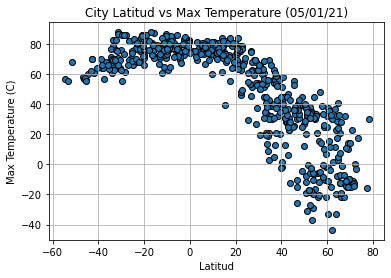

In [12]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitud vs Max Temperature (05/01/21)')
plt.grid()
plt.show()

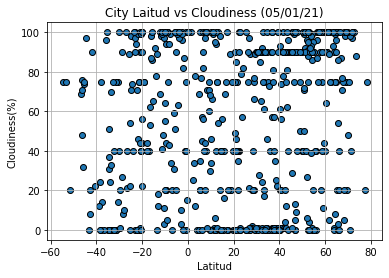

In [13]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Cloudiness(%)')
plt.title('City Laitud vs Cloudiness (05/01/21)')
plt.grid()
plt.show()

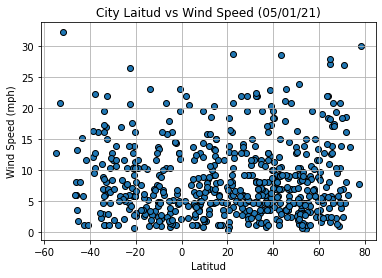

In [14]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Wind Speed (mph)')
plt.title('City Laitud vs Wind Speed (05/01/21)')
plt.grid()
plt.show()

In [15]:
filt=(weather_df['Lat']>0)
North_Hemisphere_df=weather_df[filt]
North_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xianyang,34.3378,108.7026,21.00,78,0,4.47,CN,1610060864
3,Barrow,71.2906,-156.7887,-11.20,70,40,4.61,US,1610060864
5,Yol,32.1667,76.2000,51.51,43,92,4.76,IN,1610060864
6,Iqaluit,63.7506,-68.5145,-20.00,69,1,2.30,CA,1610060865
7,Hilo,19.7297,-155.0900,80.60,57,40,4.61,US,1610060865
...,...,...,...,...,...,...,...,...,...
568,Zachary,30.6485,-91.1565,50.00,71,90,14.97,US,1610060940
569,Austell,33.8126,-84.6344,37.99,93,90,8.05,US,1610060940
570,Examilia,37.9000,22.9333,52.00,70,35,1.01,GR,1610060940
571,Turukhansk,65.8167,87.9833,-19.01,88,40,12.68,RU,1610060940


The r-squared is: 0.699590975147875


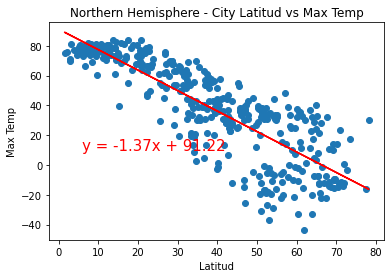

In [16]:
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - City Latitud vs Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [17]:
filt=(weather_df['Lat']<0)
South_Hemisphere_df=weather_df[filt]
South_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mmabatho,-25.8500,25.6333,70.77,77,89,8.41,ZA,1610060864
2,East London,-33.0153,27.9116,70.50,81,0,16.93,ZA,1610060864
4,Necochea,-38.5473,-58.7368,64.00,84,24,12.03,AR,1610060864
8,Kavieng,-2.5744,150.7967,83.73,77,96,14.34,PG,1610060865
9,Busselton,-33.6500,115.3333,79.00,35,70,5.99,AU,1610060865
...,...,...,...,...,...,...,...,...,...
551,Acaraú,-2.8856,-40.1200,80.40,78,3,14.50,BR,1610060938
552,Port Augusta,-32.5000,137.7667,82.99,78,0,14.97,AU,1610060938
559,Puerto Baquerizo Moreno,-0.9000,-89.6000,78.80,83,75,12.66,EC,1610060939
563,Nelson Bay,-32.7167,152.1500,69.80,64,75,21.85,AU,1610060939


The r-squared is: 0.32969721104781075


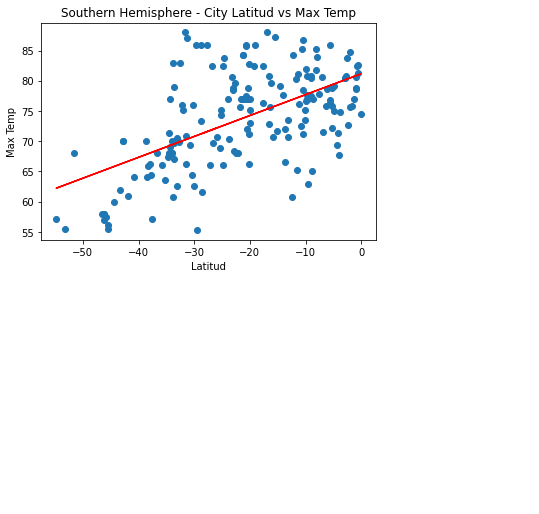

In [18]:
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - City Latitud vs Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.12133481951743015


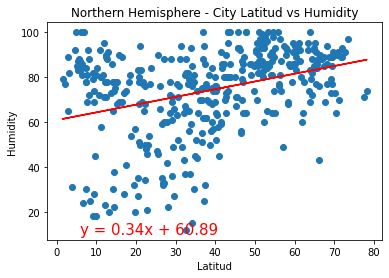

In [19]:
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - City Latitud vs Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.14325366524908784


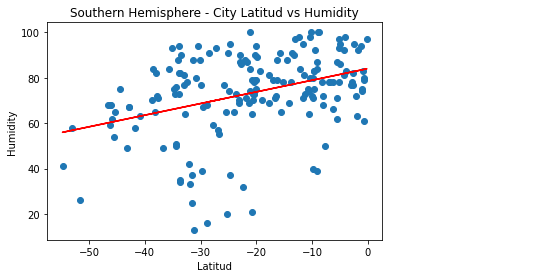

In [20]:
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - City Latitud vs Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0593371007345345


C:\Users\Beto\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Beto\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


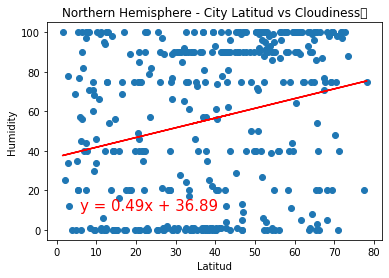

In [21]:
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - City Latitud vs Cloudiness	')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07456344994424431


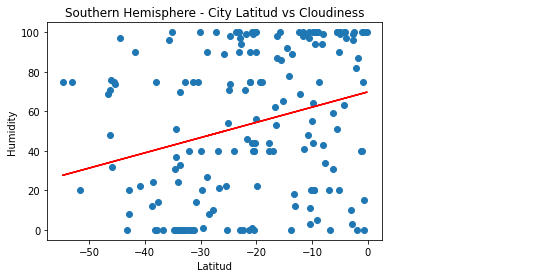

In [22]:
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - City Latitud vs Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.008828190991373852


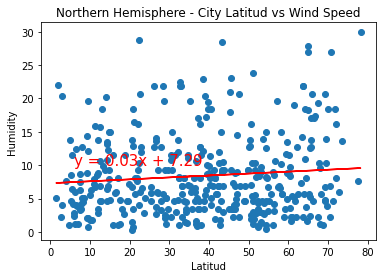

In [23]:
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - City Latitud vs Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.024564151227631476


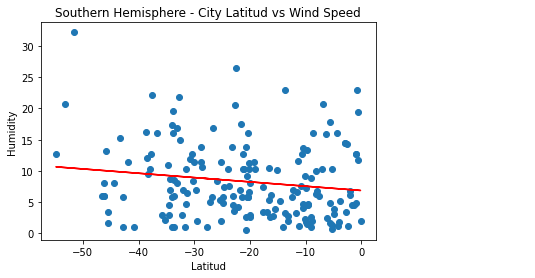

In [24]:
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - City Latitud vs Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()